In [6]:
'''
Academic Integrity Statement

"I (We) certify that the code and data in this assignment were generated independently,
using only the tools and resources defined in the course and that I (we) did not receive
any external help, coaching or contributions during the production of this work."

'''

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [8]:
from keras.layers import Dropout
from keras import regularizers

In [9]:
x= tf.keras.datasets.fashion_mnist
(Xtrain, ytrain), (Xtest, ytest) = x.load_data()

In [10]:
Xtrain = Xtrain.reshape((len(Xtrain),28,28,1))
Xtest = Xtest.reshape((len(Xtest),28,28,1))
print(Xtrain.shape)
print(Xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
ytrain = tf.keras.utils.to_categorical(ytrain,num_classes = 10)
ytest = tf.keras.utils.to_categorical(ytest,num_classes = 10)
#from sklearn.preprocessing import LabelBinarizer
#label_as_binary = LabelBinarizer()
#train__y_labels = label_as_binary.fit_transform(ytrain)

In [12]:
#coverting to float 
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')

In [13]:
Xtrain/=255.0
Xtest/=255.0

In [14]:
from keras.layers import Dropout

In [ ]:
#early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='loss',verbose=1,patience=10)

In [ ]:

model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(filters=64, kernel_size = (2, 2),strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
     tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
     tf.keras.layers.Dropout(0.4),

     tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(pool_size=2),
     tf.keras.layers.Dropout(0.4),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(256,activation = 'relu'),
     tf.keras.layers.Dense(10,activation = 'sigmoid'),
    ])

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [ ]:
my_cnn = model.fit(Xtrain,
                     ytrain,
                     batch_size=32,
                     validation_data=(Xtrain,ytrain),
                     epochs = 10,
                   callbacks=[es])

Epoch 1/10
1875/1875 [==============================] - 20s 5ms/step - loss: 0.4962 - accuracy: 0.8181 - val_loss: 0.3268 - val_accuracy: 0.8800
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3473 - accuracy: 0.8713 - val_loss: 0.2703 - val_accuracy: 0.9019
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3004 - accuracy: 0.8892 - val_loss: 0.2373 - val_accuracy: 0.9121
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2744 - accuracy: 0.8964 - val_loss: 0.2200 - val_accuracy: 0.9201
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2560 - accuracy: 0.9040 - val_loss: 0.2112 - val_accuracy: 0.9214
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2427 - accuracy: 0.9091 - val_loss: 0.1806 - val_accuracy: 0.9332
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2267 - accuracy: 0.9142 - val_loss: 0.1745 - val_ac

In [ ]:
#printing the accuracy
test_loss, test_acc = model.evaluate(Xtest, ytest)
test_acc= test_acc*100
test_loss = test_loss*100
print("The test accuracy :",test_acc)
print("The test loss :", test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.2279 - accuracy: 0.9167
The test accuracy : 91.6700005531311
The test loss : 22.79253453016281


Text(0.5, 1.0, 'ACCURACY')

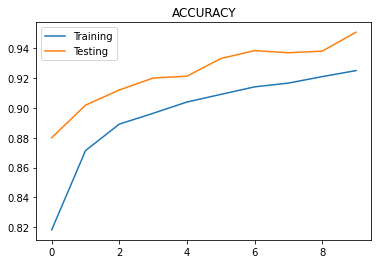

In [ ]:
plt.plot(my_cnn.history['accuracy'],label = "Training")
plt.plot(my_cnn.history['val_accuracy'],label = "Testing")
plt.legend()
plt.title("ACCURACY")

Text(0.5, 1.0, 'LOSS')

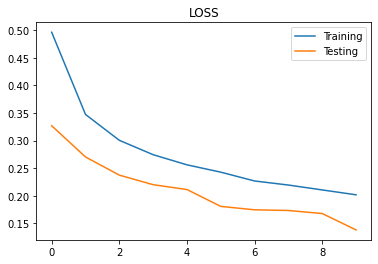

In [ ]:
plt.plot(my_cnn.history['loss'],label = "Training")
plt.plot(my_cnn.history['val_loss'],label = "Testing")
plt.legend()
plt.title("LOSS")

#  PART IV 

# **OPTIMIZERS**

In [15]:
#optimizer "sgd"
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(filters=64, kernel_size = (2, 2),strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
     tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
     tf.keras.layers.Dropout(0.4),

     tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(pool_size=2),
     tf.keras.layers.Dropout(0.4),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(256,activation = 'relu'),
     tf.keras.layers.Dense(10,activation = 'sigmoid'),
    ])

model.compile(loss = 'categorical_crossentropy',optimizer = 'sgd',metrics = ['accuracy'])

In [17]:
my_cnn = model.fit(Xtrain,
                     ytrain,
                     batch_size=32,
                     validation_data=(Xtrain,ytrain),
                     epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.9925 - accuracy: 0.6302 - val_loss: 0.7155 - val_accuracy: 0.7428
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.6930 - accuracy: 0.7387 - val_loss: 0.5983 - val_accuracy: 0.7803
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6004 - accuracy: 0.7746 - val_loss: 0.5465 - val_accuracy: 0.7982
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5416 - accuracy: 0.7977 - val_loss: 0.4882 - val_accuracy: 0.8332
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.5024 - accuracy: 0.8147 - val_loss: 0.4677 - val_accuracy: 0.8384


Text(0.5, 1.0, 'ACCURACY')

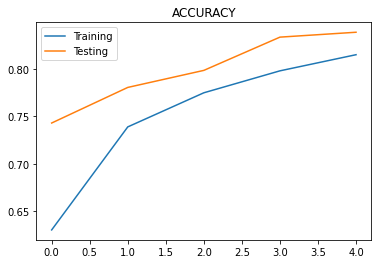

In [18]:
plt.plot(my_cnn.history['accuracy'],label = "Training")
plt.plot(my_cnn.history['val_accuracy'],label = "Testing")
plt.legend()
plt.title("ACCURACY")

In [19]:
#optimizer "adagrad"
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(filters=64, kernel_size = (2, 2),strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
     tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
     tf.keras.layers.Dropout(0.4),

     tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(pool_size=2),
     tf.keras.layers.Dropout(0.4),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(256,activation = 'relu'),
     tf.keras.layers.Dense(10,activation = 'sigmoid'),
    ])

model.compile(loss = 'categorical_crossentropy',optimizer = 'adagrad',metrics = ['accuracy'])

In [20]:
my_cnn = model.fit(Xtrain,
                     ytrain,
                     batch_size=32,
                     validation_data=(Xtrain,ytrain),
                     epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 1.4399 - accuracy: 0.5073 - val_loss: 0.9401 - val_accuracy: 0.6454
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.9075 - accuracy: 0.6495 - val_loss: 0.8219 - val_accuracy: 0.6917
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.8372 - accuracy: 0.6829 - val_loss: 0.7668 - val_accuracy: 0.7181
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.7900 - accuracy: 0.7033 - val_loss: 0.7280 - val_accuracy: 0.7351
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.7564 - accuracy: 0.7184 - val_loss: 0.6986 - val_accuracy: 0.7450


Text(0.5, 1.0, 'ACCURACY')

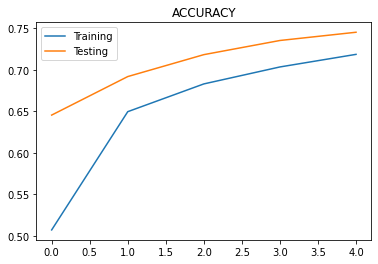

In [21]:
plt.plot(my_cnn.history['accuracy'],label = "Training")
plt.plot(my_cnn.history['val_accuracy'],label = "Testing")
plt.legend()
plt.title("ACCURACY")

In [22]:
#optimizer "Nadam"
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(filters=64, kernel_size = (2, 2),strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
     tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
     tf.keras.layers.Dropout(0.4),

     tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(pool_size=2),
     tf.keras.layers.Dropout(0.4),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(256,activation = 'relu'),
     tf.keras.layers.Dense(10,activation = 'sigmoid'),
    ])

model.compile(loss = 'categorical_crossentropy',optimizer = 'Nadam',metrics = ['accuracy'])

In [23]:
my_cnn = model.fit(Xtrain,
                     ytrain,
                     batch_size=32,
                     validation_data=(Xtrain,ytrain),
                     epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 27s 13ms/step - loss: 0.4949 - accuracy: 0.8182 - val_loss: 0.3330 - val_accuracy: 0.8790
Epoch 2/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3448 - accuracy: 0.8726 - val_loss: 0.2780 - val_accuracy: 0.8990
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3013 - accuracy: 0.8880 - val_loss: 0.2340 - val_accuracy: 0.9145
Epoch 4/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2762 - accuracy: 0.8961 - val_loss: 0.2135 - val_accuracy: 0.9220
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2545 - accuracy: 0.9050 - val_loss: 0.1992 - val_accuracy: 0.9278


Text(0.5, 1.0, 'ACCURACY')

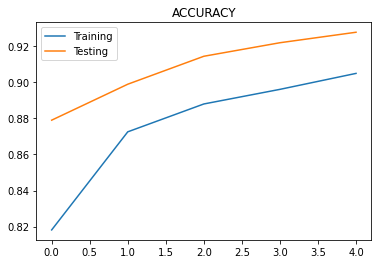

In [24]:
plt.plot(my_cnn.history['accuracy'],label = "Training")
plt.plot(my_cnn.history['val_accuracy'],label = "Testing")
plt.legend()
plt.title("ACCURACY")

# **DROPOUTS**

In [25]:
#dropout 0.2
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(filters=64, kernel_size = (2, 2),strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
     tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
     tf.keras.layers.Dropout(0.2),

     tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(pool_size=2),
     tf.keras.layers.Dropout(0.2),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(256,activation = 'relu'),
     tf.keras.layers.Dense(10,activation = 'sigmoid'),
    ])

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [26]:
my_cnn = model.fit(Xtrain,
                     ytrain,
                     batch_size=32,
                     validation_data=(Xtrain,ytrain),
                     epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4463 - accuracy: 0.8360 - val_loss: 0.3145 - val_accuracy: 0.8841
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3095 - accuracy: 0.8851 - val_loss: 0.2548 - val_accuracy: 0.9036
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2652 - accuracy: 0.9009 - val_loss: 0.2133 - val_accuracy: 0.9188
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2354 - accuracy: 0.9115 - val_loss: 0.1877 - val_accuracy: 0.9298
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2148 - accuracy: 0.9200 - val_loss: 0.1686 - val_accuracy: 0.9370


Text(0.5, 1.0, 'ACCURACY')

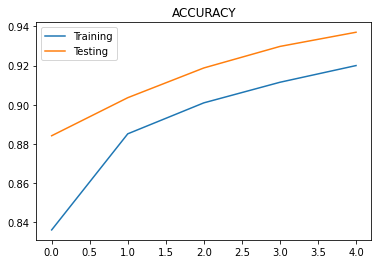

In [27]:
plt.plot(my_cnn.history['accuracy'],label = "Training")
plt.plot(my_cnn.history['val_accuracy'],label = "Testing")
plt.legend()
plt.title("ACCURACY")

In [31]:
#dropout 0.3
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(filters=64, kernel_size = (2, 2),strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
     tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
     tf.keras.layers.Dropout(0.3),

     tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(pool_size=2),
     tf.keras.layers.Dropout(0.3),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(256,activation = 'relu'),
     tf.keras.layers.Dense(10,activation = 'sigmoid'),
    ])

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [32]:
my_cnn = model.fit(Xtrain,
                     ytrain,
                     batch_size=32,
                     validation_data=(Xtrain,ytrain),
                     epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 26s 13ms/step - loss: 0.4724 - accuracy: 0.8263 - val_loss: 0.3100 - val_accuracy: 0.8892
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3272 - accuracy: 0.8787 - val_loss: 0.2529 - val_accuracy: 0.9074
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2795 - accuracy: 0.8964 - val_loss: 0.2275 - val_accuracy: 0.9176
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2550 - accuracy: 0.9040 - val_loss: 0.2042 - val_accuracy: 0.9247
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2344 - accuracy: 0.9111 - val_loss: 0.1862 - val_accuracy: 0.9311


Text(0.5, 1.0, 'ACCURACY')

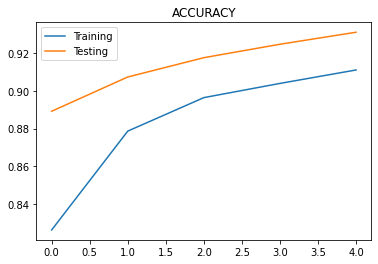

In [33]:
plt.plot(my_cnn.history['accuracy'],label = "Training")
plt.plot(my_cnn.history['val_accuracy'],label = "Testing")
plt.legend()
plt.title("ACCURACY")

In [34]:
#dropout 0.25
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(filters=64, kernel_size = (2, 2),strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
     tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
     tf.keras.layers.Dropout(0.25),

     tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(pool_size=2),
     tf.keras.layers.Dropout(0.25),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(256,activation = 'relu'),
     tf.keras.layers.Dense(10,activation = 'sigmoid'),
    ])

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [35]:
my_cnn = model.fit(Xtrain,
                     ytrain,
                     batch_size=32,
                     validation_data=(Xtrain,ytrain),
                     epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4595 - accuracy: 0.8317 - val_loss: 0.3247 - val_accuracy: 0.8801
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3172 - accuracy: 0.8824 - val_loss: 0.2511 - val_accuracy: 0.9093
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2743 - accuracy: 0.8978 - val_loss: 0.2265 - val_accuracy: 0.9159
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2475 - accuracy: 0.9072 - val_loss: 0.1935 - val_accuracy: 0.9300
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2247 - accuracy: 0.9157 - val_loss: 0.2053 - val_accuracy: 0.9238


Text(0.5, 1.0, 'ACCURACY')

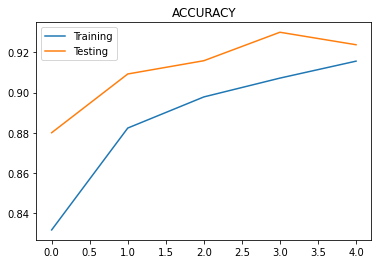

In [36]:
plt.plot(my_cnn.history['accuracy'],label = "Training")
plt.plot(my_cnn.history['val_accuracy'],label = "Testing")
plt.legend()
plt.title("ACCURACY")

# **KERNEL SIZE**

In [37]:
#kernel size (3,3)
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(filters=64, kernel_size = (3, 3),strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
     tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
     tf.keras.layers.Dropout(0.4),

     tf.keras.layers.Conv2D(filters=64, kernel_size = (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(pool_size=2),
     tf.keras.layers.Dropout(0.4),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(256,activation = 'relu'),
     tf.keras.layers.Dense(10,activation = 'sigmoid'),
    ])

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [38]:
my_cnn = model.fit(Xtrain,
                     ytrain,
                     batch_size=32,
                     validation_data=(Xtrain,ytrain),
                     epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4733 - accuracy: 0.8252 - val_loss: 0.3165 - val_accuracy: 0.8878
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3244 - accuracy: 0.8802 - val_loss: 0.2653 - val_accuracy: 0.9074
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2845 - accuracy: 0.8949 - val_loss: 0.2189 - val_accuracy: 0.9196
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2607 - accuracy: 0.9026 - val_loss: 0.2082 - val_accuracy: 0.9229
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2417 - accuracy: 0.9093 - val_loss: 0.1859 - val_accuracy: 0.9320


Text(0.5, 1.0, 'ACCURACY')

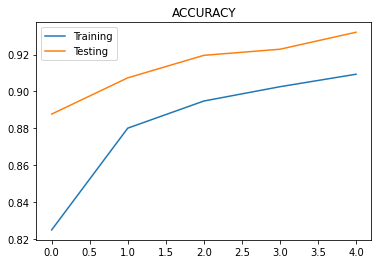

In [39]:
plt.plot(my_cnn.history['accuracy'],label = "Training")
plt.plot(my_cnn.history['val_accuracy'],label = "Testing")
plt.legend()
plt.title("ACCURACY")

In [40]:
#kernel size (4,4)
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(filters=64, kernel_size = (4, 4),strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
     tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
     tf.keras.layers.Dropout(0.4),

     tf.keras.layers.Conv2D(filters=64, kernel_size = (4,4), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(pool_size=2),
     tf.keras.layers.Dropout(0.4),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(256,activation = 'relu'),
     tf.keras.layers.Dense(10,activation = 'sigmoid'),
    ])

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [41]:
my_cnn = model.fit(Xtrain,
                     ytrain,
                     batch_size=32,
                     validation_data=(Xtrain,ytrain),
                     epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.4673 - accuracy: 0.8291 - val_loss: 0.3016 - val_accuracy: 0.8896
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3281 - accuracy: 0.8770 - val_loss: 0.2774 - val_accuracy: 0.8931
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2895 - accuracy: 0.8914 - val_loss: 0.2166 - val_accuracy: 0.9196
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2663 - accuracy: 0.8987 - val_loss: 0.2046 - val_accuracy: 0.9223
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2505 - accuracy: 0.9063 - val_loss: 0.1833 - val_accuracy: 0.9318


Text(0.5, 1.0, 'ACCURACY')

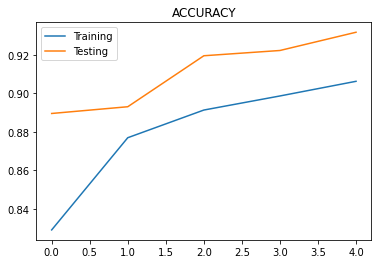

In [42]:
plt.plot(my_cnn.history['accuracy'],label = "Training")
plt.plot(my_cnn.history['val_accuracy'],label = "Testing")
plt.legend()
plt.title("ACCURACY")

In [43]:
#kernel size (5,5)
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(filters=64, kernel_size = (5, 5),strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
     tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
     tf.keras.layers.Dropout(0.4),

     tf.keras.layers.Conv2D(filters=64, kernel_size = (5,5), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(pool_size=2),
     tf.keras.layers.Dropout(0.4),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(256,activation = 'relu'),
     tf.keras.layers.Dense(10,activation = 'sigmoid'),
    ])

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [44]:
my_cnn = model.fit(Xtrain,
                     ytrain,
                     batch_size=32,
                     validation_data=(Xtrain,ytrain),
                     epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4684 - accuracy: 0.8276 - val_loss: 0.3061 - val_accuracy: 0.8882
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3281 - accuracy: 0.8778 - val_loss: 0.2582 - val_accuracy: 0.9045
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2937 - accuracy: 0.8906 - val_loss: 0.2267 - val_accuracy: 0.9156
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2700 - accuracy: 0.8984 - val_loss: 0.2146 - val_accuracy: 0.9199
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2551 - accuracy: 0.9037 - val_loss: 0.2070 - val_accuracy: 0.9247


Text(0.5, 1.0, 'ACCURACY')

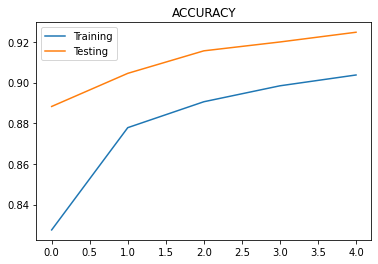

In [45]:
plt.plot(my_cnn.history['accuracy'],label = "Training")
plt.plot(my_cnn.history['val_accuracy'],label = "Testing")
plt.legend()
plt.title("ACCURACY")

# **DATA AUGMENTATION**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Dropout
from keras import regularizers
# from tensorflow.keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from skimage import io

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

X_train = X_train.reshape(X_train.shape[0], *im_shape)
X_test = X_test.reshape(X_test.shape[0], *im_shape)

print('x_train shape: {}'.format(X_train.shape))
print('x_test shape: {}'.format(X_test.shape))

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [4]:
# Normalize the array
X_train = X_train / 255
X_test = X_test / 255

In [5]:
# Model
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(16, 4, padding='same', activation = 'relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 4, padding='same', activation = 'relu'),
     tf.keras.layers.MaxPooling2D(),
    #  tf.keras.layers.Conv2D(64, 4, padding='same', activation = 'relu'),
    #  tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(150,activation = 'relu'),
     tf.keras.layers.Dense(40,activation = 'sigmoid'),
     tf.keras.layers.Dense(10,activation = 'softmax'),
    ])

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
model.fit(X_train,y_train,epochs = 5, validation_data=(X_train,y_train),batch_size=16,validation_split=0.25, verbose=2)

Epoch 1/5
2813/2813 - 28s - loss: 0.5427 - accuracy: 0.8106 - val_loss: 0.3775 - val_accuracy: 0.8633 - 28s/epoch - 10ms/step
Epoch 2/5
2813/2813 - 33s - loss: 0.3279 - accuracy: 0.8814 - val_loss: 0.2989 - val_accuracy: 0.8911 - 33s/epoch - 12ms/step
Epoch 3/5
2813/2813 - 33s - loss: 0.2773 - accuracy: 0.8985 - val_loss: 0.2877 - val_accuracy: 0.8925 - 33s/epoch - 12ms/step
Epoch 4/5
2813/2813 - 29s - loss: 0.2458 - accuracy: 0.9087 - val_loss: 0.2863 - val_accuracy: 0.8955 - 29s/epoch - 10ms/step
Epoch 5/5
2813/2813 - 27s - loss: 0.2241 - accuracy: 0.9169 - val_loss: 0.2666 - val_accuracy: 0.9017 - 27s/epoch - 10ms/step


In [ ]:
 model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2846 - accuracy: 0.8981


[0.2845855951309204, 0.8981000185012817]

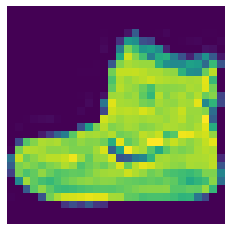

In [ ]:
# Single Image

plt.axis('off')
plt.imshow(X_train[0])
# X_train[0].shape

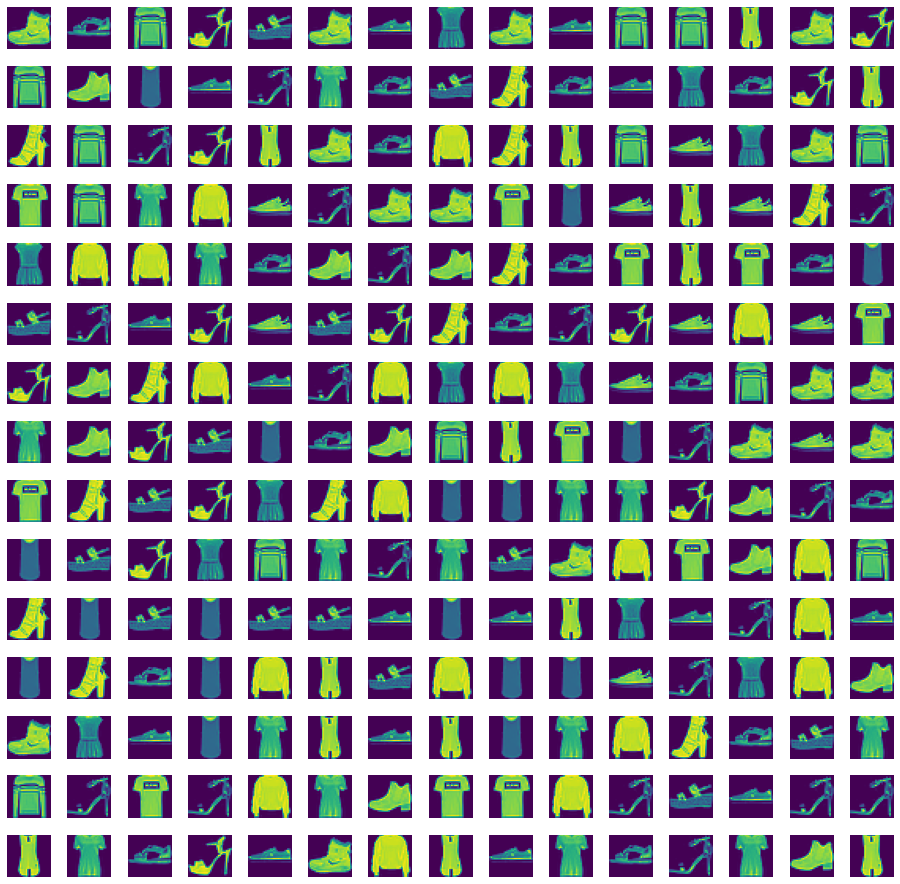

In [ ]:
# Multi Image

fig, axes = plt.subplots(15, 15, figsize = (16,16))
axes = axes.ravel() 
n = 16
plt.subplots_adjust(hspace=0.4)
for i in np.arange(0, 15 * 15):

    name = np.random.randint(0, n)
    axes[i].imshow( X_train[name,1:])
#     label_index = int(X_train[name,0])
#     axes[i].set_title(class_names[label_index],fontsize=8)
    axes[i].axis('off')

In [ ]:
data_augmentation = tf.keras.models.Sequential([
      tf.keras.layers.experimental.preprocessing.Resizing(height=28, width=28),
    tf.keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.5),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.3),
#     tf.keras.layers.experimental.preprocessing.RandomContrast(factor=0.6),
])

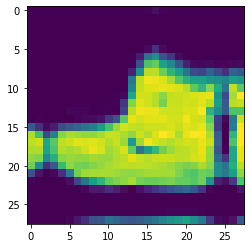

In [ ]:
# Single Image after augmentation
plt.imshow(data_augmentation(X_train)[0])

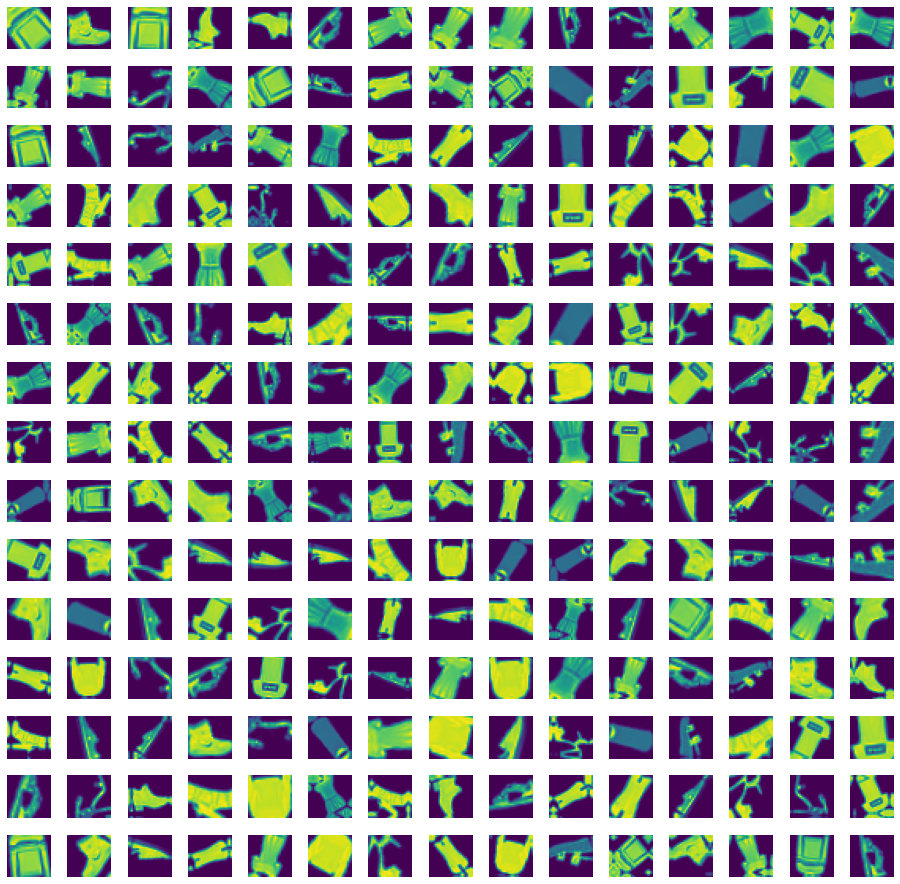

In [ ]:
# Multi Image

fig, axes = plt.subplots(15, 15, figsize = (16,16))
axes = axes.ravel() 
n = 16
plt.subplots_adjust(hspace=0.4)
for i in np.arange(0, 15 * 15):

    name = np.random.randint(0, n)
    axes[i].imshow(data_augmentation(X_train)[name,1:])
#     label_index = int(X_train[name,0])
#     axes[i].set_title(class_names[label_index],fontsize=8)
    axes[i].axis('off')

In [ ]:
# Model with Augmentation
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(16, 4, padding='same', activation = 'relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 4, padding='same', activation = 'relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64, 4, padding='same', activation = 'relu'),
     tf.keras.layers.MaxPooling2D(),
     data_augmentation,
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(150,activation = 'relu'),
     tf.keras.layers.Dense(40,activation = 'sigmoid'),
     tf.keras.layers.Dense(10,activation = 'softmax'),
    ])   

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
model.fit(X_train,y_train,epochs = 5, validation_data=(X_train,y_train),batch_size=16,validation_split=0.25, verbose=2)

Epoch 1/5
2813/2813 - 306s - loss: 0.6412 - accuracy: 0.7738 - val_loss: 0.4387 - val_accuracy: 0.8455 - 306s/epoch - 109ms/step
Epoch 2/5
2813/2813 - 306s - loss: 0.4024 - accuracy: 0.8565 - val_loss: 0.3986 - val_accuracy: 0.8601 - 306s/epoch - 109ms/step
Epoch 3/5
2813/2813 - 306s - loss: 0.3716 - accuracy: 0.8676 - val_loss: 0.3740 - val_accuracy: 0.8613 - 306s/epoch - 109ms/step
Epoch 4/5
2813/2813 - 310s - loss: 0.3645 - accuracy: 0.8698 - val_loss: 0.3881 - val_accuracy: 0.8629 - 310s/epoch - 110ms/step
Epoch 5/5


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.4189 - accuracy: 0.8546


[0.4189395010471344, 0.8546000123023987]

# **REFERENCES**

https://numpy.org/doc/stable/reference/

https://pandas.pydata.org/docs/reference/

https://matplotlib.org/stable/index.html

https://docs.python.org/3.9/library/index.html

https://keras.io/api/models/model/

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split

https://www.tensorflow.org/tutorials/keras/classification

https://www.tensorflow.org/tutorials/images/data_augmentation

https://github.com/zalandoresearch/fashion-mnist